# A1-Q6: Parametric Spline

In [175]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

## (a) Write your nickname and display it

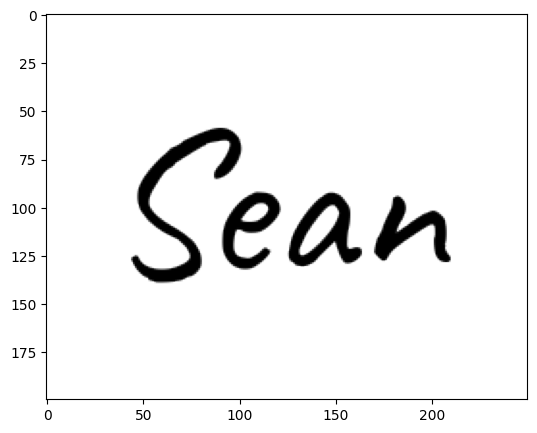

In [176]:
# Display nickname image
f = plt.imread('Sean.png')
plt.figure(figsize=(9, 5))
plt.imshow(f)

## (b) Hardcode interpolation points

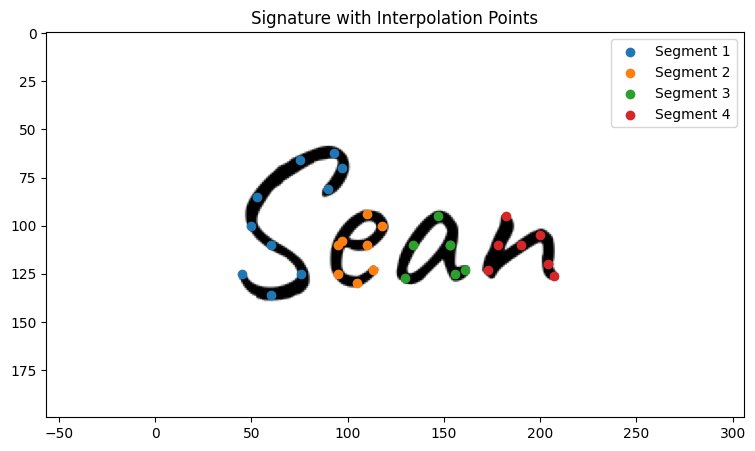

In [177]:
x1 = [45, 60, 76, 60, 50, 53, 75, 93, 97, 90]
y1 = [125, 136, 125, 110, 100, 85, 66, 62, 70, 81]

x2 = [97, 110, 118, 110, 95, 95, 105, 113]
y2 = [108, 110, 100, 94, 110, 125, 130, 123]

x3 = [153, 130, 134, 147, 153, 156, 161]
y3 = [110, 127, 110, 95, 110, 125, 123]

x4 = [182, 178, 173, 190, 200, 204, 207]
y4 = [95, 110, 123, 110, 105, 120, 126]

segments = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
# Plot the signature with interpolation points
plt.figure(figsize=(9, 5))
plt.scatter(x1, y1, label='Segment 1')
plt.scatter(x2, y2, label='Segment 2')
plt.scatter(x3, y3, label='Segment 3')
plt.scatter(x4, y4, label='Segment 4')
plt.imshow(f)
plt.axis('equal')
plt.title("Signature with Interpolation Points")
plt.legend()
plt.show()

## (c) `ParametricSpline`

In [178]:
def ParametricSpline(Sx, Sy):
    '''
     x_cs, y_cs, t = ParametricSpline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.

       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''

    t = np.zeros(len(Sx))
    for i in range(1, len(Sx)):
        t[i] = t[i-1] + np.sqrt((Sx[i] - Sx[i-1])**2 + (Sy[i] - Sy[i-1])**2)

    # Normalize t to [0, 1]
    t = t / t[-1]

    # Create cubic splines for x and y components
    x_cs = make_interp_spline(t, Sx, k=3)
    y_cs = make_interp_spline(t, Sy, k=3)

    return x_cs, y_cs, t

## (d) Find parametric splines for each segment

In [179]:
splines = []
for x, y in segments:
    splines.append(ParametricSpline(x, y))

## (e) Plot the segments

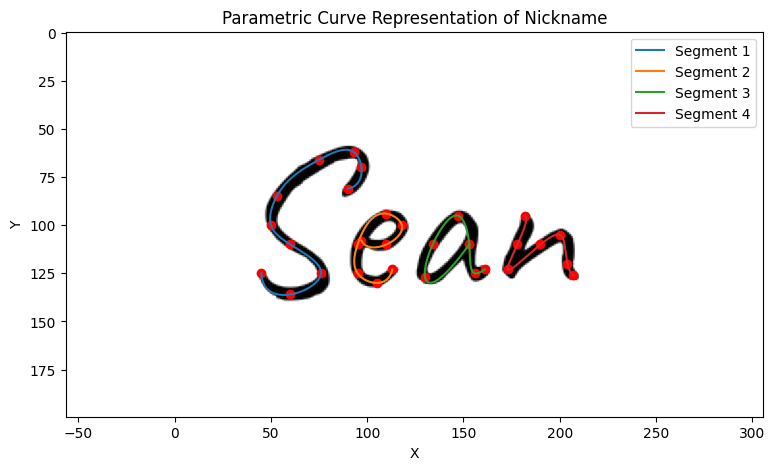

In [180]:
plt.figure(figsize=(9, 5))
for i, ((x, y), (x_cs, y_cs, t)) in enumerate(zip(segments, splines)):
    # Fine parameter values for a smooth curve
    t_fine = np.linspace(0, 1, 1000)

    # Evaluate the splines
    x_smooth = x_cs(t_fine)
    y_smooth = y_cs(t_fine)

    # Plot the smooth spline
    plt.plot(x_smooth, y_smooth, label=f"Segment {i+1}")

    # Plot the original interpolation points
    plt.scatter(x, y, color='r')

plt.axis('equal')
plt.title("Parametric Curve Representation of Nickname")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.imshow(f)